In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/colab/CORE_Proyecto_i/retail_sales_dataset_clean.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age segment,Sales Level
0,0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Middle Adult,Baja
1,1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Young Adult,Media
2,2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mature Adult,Baja
3,3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Middle Adult,Baja
4,4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Young Adult,Baja


#Análisis Descriptivo y Visualización

Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [3]:
# Frecuencia del tipo de producto según segmento de edad y género
df.groupby(['Age segment', 'Gender'])['Product Category'].value_counts().unstack()

Product Category     Beauty  Clothing  Electronics
Age segment  Gender                               
Elderly      Female      13        24           18
             Male        18        17           25
Mature Adult Female      57        55           48
             Male        38        54           57
Middle Adult Female      45        56           55
             Male        39        57           51
Young Adult  Female      51        39           49
             Male        46        49           39

In [4]:
# Edad promedio por segmento
df.groupby('Age segment')['Age'].mean()

,Age
Age segment,
Elderly,62.147826
Mature Adult,52.258900
Middle Adult,38.181518
Young Adult,23.912088


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Total de ventas por mes
df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum().sort_values(ascending=False)

,Total Amount
Date,
2023-05,53150
2023-10,46580
2023-12,44690
2023-02,44060
2023-08,36960
2023-06,36715
2023-07,35465
2023-01,35450
2023-11,34920


In [6]:
df.groupby('Product Category').agg({'Total Amount': 'sum', 'Quantity': 'sum'})

,Total Amount,Quantity
Product Category,,
Beauty,143515,771
Clothing,155580,894
Electronics,156905,849


In [7]:
df.groupby('Sales Level').agg({'Total Amount': 'sum', 'Quantity': 'sum'})

,Total Amount,Quantity
Sales Level,,
Alta,98000,196
Baja,113400,1668
Media,244600,650


Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

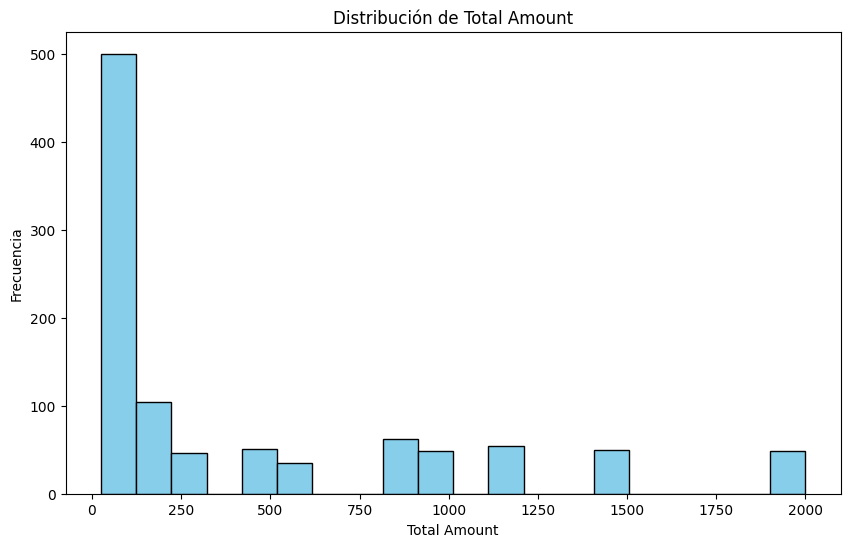

In [9]:
# Histograma de la frecuencia del monto total de compra
plt.figure(figsize=(10, 6))

plt.hist(df['Total Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frecuencia')
plt.show()

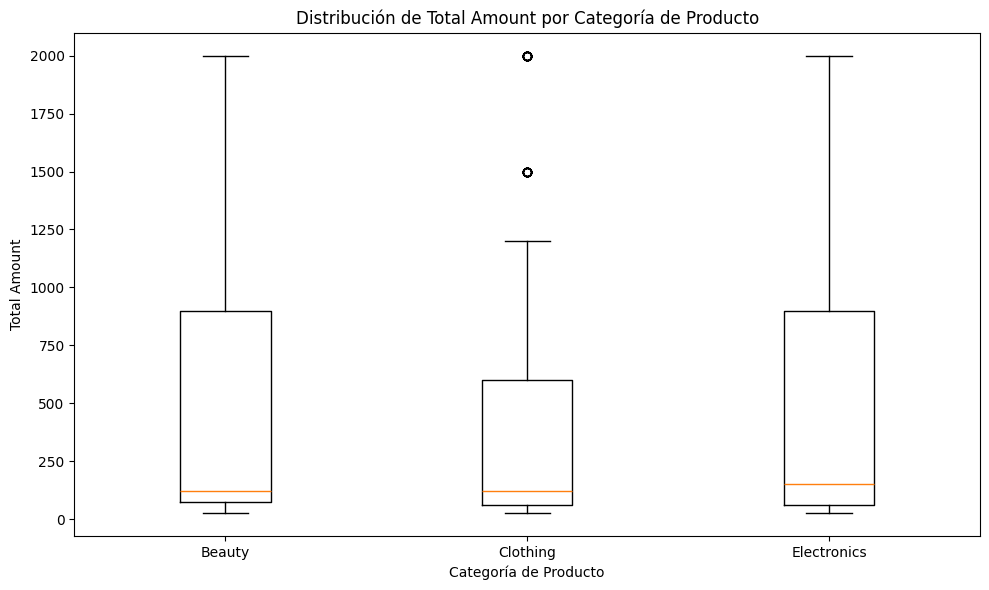

In [17]:
# diagrama de caja de de las ventas por categoria

plt.figure(figsize=(10, 6))

# Crear un diagrama de caja para cada categoría de producto
beauty = df[df['Product Category'] == 'Beauty']
clothing = df[df['Product Category'] == 'Clothing']
electronics = df[df['Product Category'] == 'Electronics']

datos = [beauty, clothing, electronics]
etiquetas = ['Beauty', 'Clothing', 'Electronics']

plt.boxplot([beauty['Total Amount'], clothing['Total Amount'], electronics['Total Amount']], tick_labels=etiquetas)

plt.title('Distribución de Total Amount por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

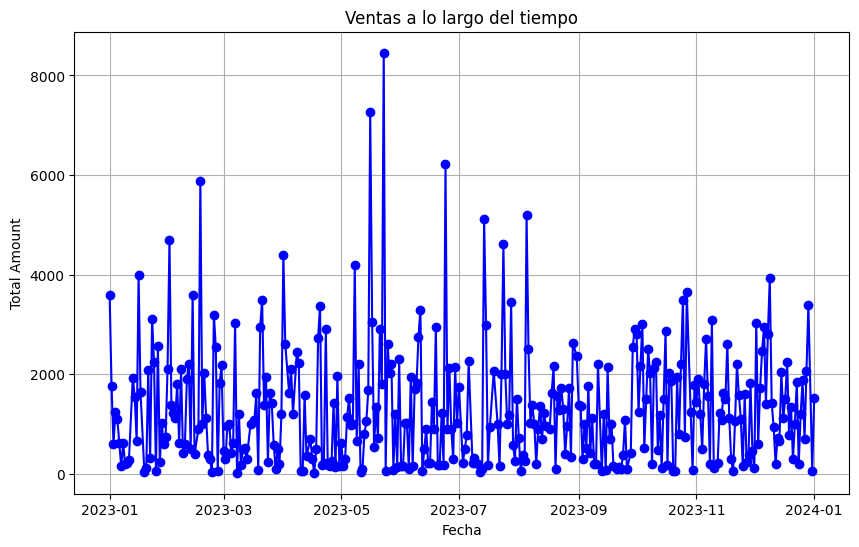

In [36]:
# Grafico de línea de las ventas en el tiempo

plt.figure(figsize=(10, 6))

plt.plot(df.groupby(df['Date'])['Total Amount'].sum(), marker='o', linestyle='-', color='blue')

plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Amount')

plt.grid(True)
plt.show()

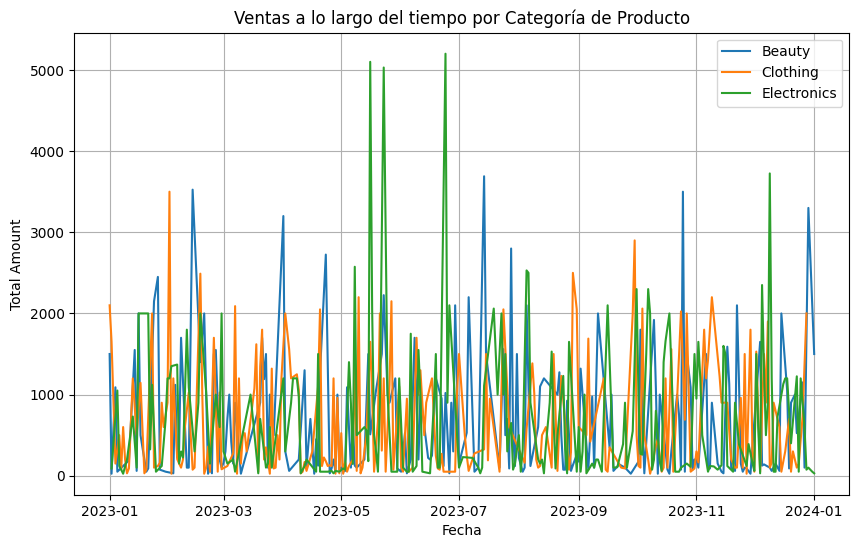

In [37]:
# Ventas a lo largo del tiempo por categoria

plt.figure(figsize=(10, 6))

beauty = df[df['Product Category'] == 'Beauty']
clothing = df[df['Product Category'] == 'Clothing']
electronics = df[df['Product Category'] == 'Electronics']

plt.plot(beauty.groupby(beauty['Date'])['Total Amount'].sum())
plt.plot(clothing.groupby(clothing['Date'])['Total Amount'].sum())
plt.plot(electronics.groupby(electronics['Date'])['Total Amount'].sum())

plt.title('Ventas a lo largo del tiempo por Categoría de Producto')
plt.xlabel('Fecha')
plt.ylabel('Total Amount')
plt.legend(['Beauty', 'Clothing', 'Electronics'])

plt.grid(True)
plt.show()

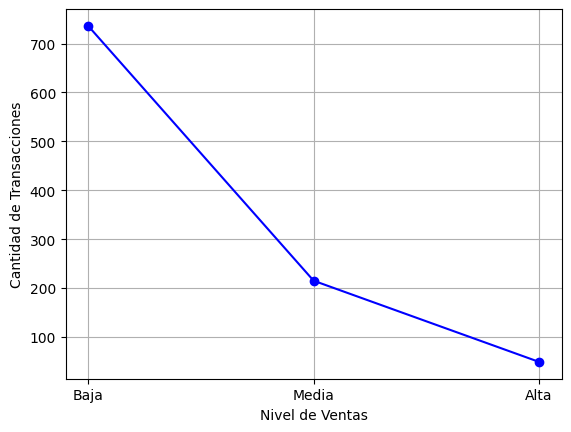

In [38]:
#Nivel de ventas por cantidad de transacciones
sales_level = df['Sales Level'].value_counts()

plt.plot(sales_level, marker='o', linestyle='-', color='blue')
plt.xlabel('Nivel de Ventas')
plt.ylabel('Cantidad de Transacciones')

plt.grid(True)
plt.show()

Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

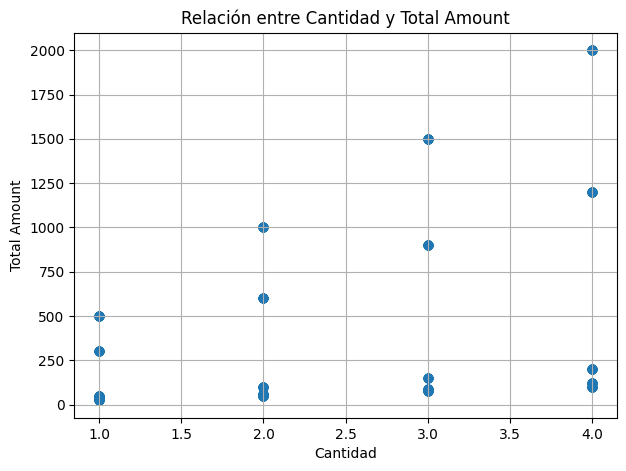

In [33]:
# Diagrama de dispersion entre la cantidad de unidades vendidas y el monto de compra
plt.figure(figsize=(7, 5))

plt.scatter(df['Quantity'], df['Total Amount'], alpha=0.6)

plt.title('Relación entre Cantidad y Total Amount')
plt.xlabel('Cantidad')
plt.ylabel('Total Amount')

plt.grid(True)
plt.show()

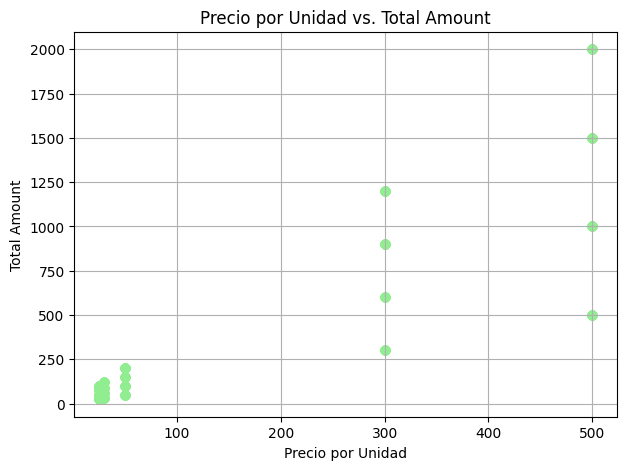

In [32]:
# Relacion entre el monto total y el precio unitario
plt.figure(figsize=(7, 5))

plt.scatter(df['Price per Unit'], df['Total Amount'], color='lightgreen')

plt.title('Precio por Unidad vs. Total Amount')
plt.xlabel('Precio por Unidad')
plt.ylabel('Total Amount')

plt.grid(True)
plt.show()

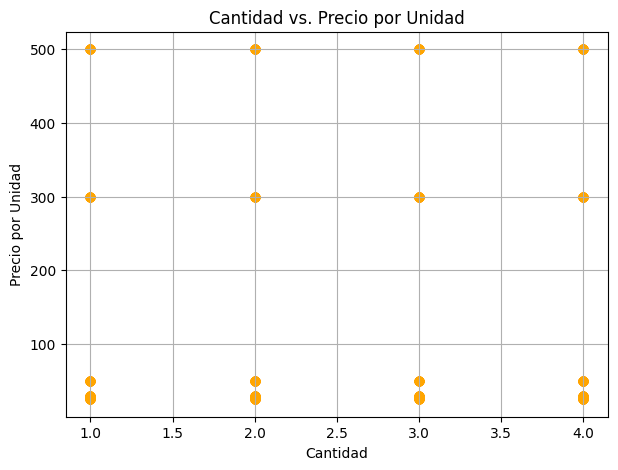

In [29]:
# Relación entre la cantidad comprada y el precio unitario
plt.figure(figsize=(7, 5))

plt.scatter(df['Quantity'], df['Price per Unit'],  color='orange')

plt.title('Cantidad vs. Precio por Unidad')
plt.xlabel('Cantidad')
plt.ylabel('Precio por Unidad')

plt.grid(True)
plt.show()

Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

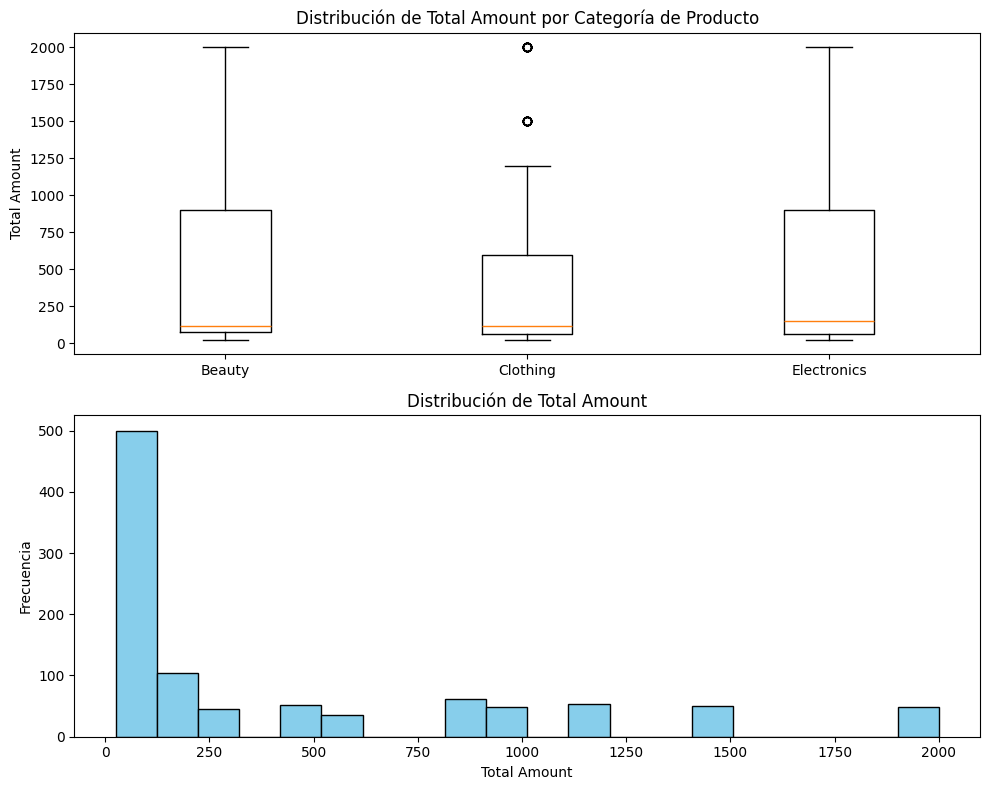

In [42]:
#Grafico combinado

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Boxplot
axs[0].boxplot([df[df['Product Category'] == 'Beauty']['Total Amount'],
                df[df['Product Category'] == 'Clothing']['Total Amount'],
                df[df['Product Category'] == 'Electronics']['Total Amount']])
axs[0].set_xticklabels(['Beauty', 'Clothing', 'Electronics'])
axs[0].set_ylabel('Total Amount')
axs[0].set_title('Distribución de Total Amount por Categoría de Producto')

# Histograma
axs[1].hist(df['Total Amount'], bins=20, color='skyblue', edgecolor='black')
axs[1].set_xlabel('Total Amount')
axs[1].set_ylabel('Frecuencia')

plt.title('Distribución de Total Amount')
plt.tight_layout()
plt.show()

